## Instalar módulos

En caso de no tener instalados las librerías de tweetpy y matplotlib

In [1]:
import sys
!{sys.executable} -m pip install tweepy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install jsonlines
!{sys.executable} -m pip install stop-words
!{sys.executable} -m pip install wordcloud

  Using cached https://files.pythonhosted.org/packages/d5/5f/daac4b4e9b30d7d2a6fdd16a880ff79f27918fe388e4dfc1983dec3a9876/tweepy-3.7.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c2/e2/9fd03d55ffb70fe51f587f20bcf407a6927eb121de86928b34d162f0b1ac/requests_oauthlib-1.2.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/73/fb/00a976f728d0d1fecfe898238ce23f502a721c0ac0ecfedb80e0d88c64e9/six-1.12.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7d/e3/20f3d364d6c8e5d2353c72a67778eb189176f08e873c9900e10c0287b84b/requests-2.21.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/16/95/699466b05b72b94a41f662dc9edf87fda4289e3602ecd42d27fcaddf7b56/oauthlib-3.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/14/2c/cd551d81dbe15200be1cf41cd03869a46fe7226e7450af7a6545bfc474c9/idna-2.8-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages

In [2]:
import tweepy
import json
import re
import config
import matplotlib.pyplot as plt
from collections import Counter
import jsonlines

In [3]:
print(config.access_token)

15777344-rTLqXYu6oNXkGdSQv5lqqTAINTYW38BOcrPCdpJ47


# Identificandonos con Twitter

Primero nos tenemos que identificar, esto creará un objeto API que podremos usar para realizar búsquedas

In [4]:
auth = tweepy.OAuthHandler(config.consumer_key, config.consumer_secret)
auth.set_access_token(config.access_token, config.access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

# Extracción de tweets dado una busqueda

Los resultados de la búsqueda se controlan con un Cursor que se encarga de controlar el acceso y no romper los tiempos.

La búsqyeda se pasa con el termino _q _y puede llevar varios operadores, revisar:

https://developer.twitter.com/en/docs/tweets/rules-and-filtering/overview/standard-operators

In [24]:
termino_busqueda="unam"
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                           lang="es").items(10)):
    print (">>>",i+1, tweet.text, len(tweet.text))

>>> 1 Antier vino a la UNAM, un profesor con el que hice verano hace cuatro años. No le había contado que me quedé en Méx… https://t.co/KHwCIN2iHB 140
>>> 2 @UNAM_MX que poca claridad y transparencia con el caso del asesinato de Aidee.
Algo me dice que se cocina un paro d… https://t.co/tQIFkhmICX 140
>>> 3 RT @sopitas: En la UNAM la Facultad de Ciencias Políticas se fue a paro por la muerte de una alumna en CCH Oriente 
https://t.co/Xzvv1Ki1pS 139
>>> 4 RT @arturoangel20: En un lapso de 7 meses tres estudiantes del CCH Oriente de la @UNAM_MX han sido asesinadas. Así como lo leen: tres femin… 140
>>> 5 RT @DanHdezSa: Las estudiantes de la UNAM no terminan sus semestres sin llorarle a alguna compañera asesinada o desaparecida. Las mujeres m… 140
>>> 6 RT @Juan_Melia: Cada día más cerca el estreno de la obra SEPULTURAS.
De Hugo Alfredo Hinojosa.
Dirección: Emma Dib.
Con Arturo Ríos, Humber… 140
>>> 7 RT @arturoangel20: En un lapso de 7 meses tres estudiantes del CCH Oriente de la @UNAM_MX

In [25]:
termino_busqueda="unam"
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                            lang="es",
                            tweet_mode='extended').items(10)):
    print (">>>",i+1, tweet.full_text, len(tweet.full_text))

>>> 1 Antier vino a la UNAM, un profesor con el que hice verano hace cuatro años. No le había contado que me quedé en México para hacer mi maestría.

Me dijo: tú querías volar más lejos, ¿Por qué no te fuiste?.
No supe cómo responderle, pues sólo trataba que no me salieran lágrimas. 277
>>> 2 @UNAM_MX que poca claridad y transparencia con el caso del asesinato de Aidee.
Algo me dice que se cocina un paro de labores enorme del tamaño de Ciudad Universitaria. 167
>>> 3 RT @sopitas: En la UNAM la Facultad de Ciencias Políticas se fue a paro por la muerte de una alumna en CCH Oriente 
https://t.co/Xzvv1Ki1pS 139
>>> 4 RT @arturoangel20: En un lapso de 7 meses tres estudiantes del CCH Oriente de la @UNAM_MX han sido asesinadas. Así como lo leen: tres femin… 140
>>> 5 RT @DanHdezSa: Las estudiantes de la UNAM no terminan sus semestres sin llorarle a alguna compañera asesinada o desaparecida. Las mujeres m… 140
>>> 6 RT @Juan_Melia: Cada día más cerca el estreno de la obra SEPULTURAS.
De Hugo

In [26]:
termino_busqueda="from:unam_mx ?"
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                           lang="es",
                            tweet_mode='extended').items(10)):
    print (">>>",i+1, tweet.full_text)

>>> 1 ¿Qué tan bueno eres dando cambio en monedas? Junta tus monedas de $1, $2 y $5 y contesta el siguiente reto del #CalendarioMatemático &gt; https://t.co/HAaQeDYDM1 https://t.co/fZnAXUX08o
>>> 2 RT @Gaceta_UNAM: ¿Hay algún libro que te haya marcado? Si los 📚 son fundamentales en tu vida, este es un evento IMPERDIBLE para ti: #Fiesta…
>>> 3 ¿Quiénes son los mensajeros del universo? #Conferencia con la #ExpertaUNAM Magdalena González, acompañada de un recital de piano 🎹 en el @iaunam. #EntradaLibre &gt; https://t.co/DFpnPzKfDl https://t.co/Y5k06cYXHC
>>> 4 RT @Gaceta_UNAM: Es el rey 👑 de las afecciones parasitarias de los trópicos 🌴. ¿Cómo combatir un padecimiento que genera cerca de 250 millo…
>>> 5 ¿Has escuchado cuentos chilenos de tradición popular? No te pierdas este espectáculo de Regaladores de palabras pensado para toda la familia. #EntradaLibre a @museodelchopo &gt; https://t.co/5wCGCNTkNP https://t.co/NgXKBf0iIk
>>> 6 ¿Sabías que el @JBUNAM tiene un centro de adopción? Ademá

In [27]:
termino_busqueda="amlo :("
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                           lang="es",
                           tweet_mode='extended').items(10)):
    print (">>>",i+1, tweet.full_text)

>>> 1 @dannagarciaaa_ @amlo Yo crei que ya serían los 4 :(
>>> 2 @miidnightcaller oye amlo dijiste que bajo tu gobierno nadie tendría privilegios &gt;:( pero vaya el privilegio que es tenerte de presidente ;)
>>> 3 me compré ropa bien bonita con la beca de amlo 

estado: esperando el depósito marzo-abril :(
>>> 4 RT @jxnasfan: Si tuviera mi beca de AMLO todo sería diferente :(
>>> 5 Si tuviera mi beca de AMLO todo sería diferente :(
>>> 6 Que mal :( https://t.co/tdmQksxB9P
>>> 7 @monfresaan Es culpa de amlo :(
>>> 8 Hasta mi familia que conocía de tí te adoraba :(
>>> 9 Me gustaría saber cuantos votaron por AMLO, triste verdad. Lo siento mucho  :( https://t.co/ojzilxBCDb
>>> 10 Mi maestro de entrevista clínica habla igual que AMLO bajito, despacito y se le van las chivas a media oración :( ya me quiero ir de esta clase para siempre.


Para controlar la localización, se puede usar el parámetro _geocode_ para identificar geocodes revisar https://www.openstreetmap.org/

In [40]:
termino_busqueda="amlo"
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                           lang="es",
                           geocode="19.4326447,-99.1331717,10km",
                           tweet_mode='extended').items(10)):
    print (">>>",i+1, tweet.text, tweet.coordinates)

>>> 1 RT @memobarba: Espero la historia le haga justicia a AMLO por sus grandes “dotes empresariales”. 

Ustedes se quejan pero, vean todo lo que… None
>>> 2 RT @Navegaciones: ""Si Germán Larrea, propietario de Grupo Mexico, decide ayudar es bienvenido, pero si no, de todas maneras lo vamos a hac… None
>>> 3 RT @Navegaciones: ""Si Germán Larrea, propietario de Grupo Mexico, decide ayudar es bienvenido, pero si no, de todas maneras lo vamos a hac… None
>>> 4 RT @DeniseDresserG: Títulos alternativos para el Plan Nacional de Desarrollo: 
“Mis Primer Libro de Catecismos”
“El Sermón de ‘La Chingada’… None
>>> 5 RT @DeniseDresserG: Títulos alternativos para el Plan Nacional de Desarrollo: 
“Mis Primer Libro de Catecismos”
“El Sermón de ‘La Chingada’… None
>>> 6 RT @DeniseDresserG: Títulos alternativos para el Plan Nacional de Desarrollo: 
“Mis Primer Libro de Catecismos”
“El Sermón de ‘La Chingada’… None
>>> 7 2 promesas del gobierno de AMLO en un mismo día: crecer al 6% y rescatar restos de

# El objeto tweet

El objeto tweet contiene bastante información y parámetros. Más información aquí: https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/intro-to-tweet-json.html

In [41]:
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Thu May 02 06:35:23 +0000 2019',
 'entities': {'hashtags': [{'indices': [98, 109], 'text': 'VeroMéndez'}],
  'media': [{'display_url': 'pic.twitter.com/ygABGrvO8I',
    'expanded_url': 'https://twitter.com/CarlosLoret/status/1123428173860024320/photo/1',
    'id': 1123428167329382400,
    'id_str': '1123428167329382400',
    'indices': [110, 133],
    'media_url': 'http://pbs.twimg.com/media/D5c390xWAAAwYCC.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/D5c390xWAAAwYCC.jpg',
    'sizes': {'large': {'h': 1280, 'resize': 'fit', 'w': 1280},
     'medium': {'h': 1200, 'resize': 'fit', 'w': 1200},
     'small': {'h': 680, 'resize': 'fit', 'w': 680},
     'thumb': {'h': 150, 'resize': 'crop', 'w': 150}},
    'source_status_id': 1123428173860024320,
    'source_status_id_str': '1123428173860024320',
    'source_user_id': 68844197,
    'source_user_id_str': '68844197',
    'type': 'photo',
    'url': 'https://t.co/ygABGrvO

In [42]:
print(tweet.contributors)
print(tweet.created_at)
print(tweet.text)
print(tweet.entities['user_mentions'])

None
2019-05-02 06:35:23
RT @CarlosLoret: No pasa Reforma Educativa de AMLO en el Senado. Les falto un voto. @WRADIOMexico #VeroMéndez https://t.co/ygABGrvO8I
[{'screen_name': 'CarlosLoret', 'name': 'Carlos Loret de Mola', 'id': 68844197, 'id_str': '68844197', 'indices': [3, 15]}, {'screen_name': 'WRADIOMexico', 'name': 'W Radio México', 'id': 20561817, 'id_str': '20561817', 'indices': [84, 97]}]


In [44]:
termino_busqueda="from:unam_mx"
print('Mentions para "{}"'.format(termino_busqueda))
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                           lang="es",
                           tweet_mode='extended').items(10)):
    for mention in tweet.entities['user_mentions']:
        print(i,mention['name'])

Mentions para "from:unam_mx"
1 Gaceta UNAM
2 Revista Universidad
3 Inst Astronomía UNAM
4 San Ildefonso
5 Gaceta UNAM
7 ENEO UNAM
8 Museo del Chopo
9 Gaceta UNAM


In [7]:
from collections import Counter
mentions=[]
termino_busqueda="from:unam_mx"
print('Mentions para "{}"'.format(termino_busqueda))
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                           lang="es",
                           tweet_mode='extended').items(10)):
    for mention in tweet.entities['user_mentions']:
        mentions.append(mention['name'])
        
print(Counter(mentions))

Mentions para "from:unam_mx"
Counter({'Gaceta UNAM': 3, 'Revista Universidad': 1, 'Inst Astronomía UNAM': 1, 'San Ildefonso': 1, 'ENEO UNAM': 1, 'Museo del Chopo': 1})


# Otros métodos

Existen otros métodos para recurperar aspectos específicos, checar documentación: http://docs.tweepy.org/en/v3.5.0/api.html?highlight=status#tweepy-api-twitter-api-wrapper

In [48]:
# users timeline
for i, tweet in enumerate(api.home_timeline(id="unam_mx")):
    print (">>>",i, tweet.text, tweet.coordinates)

>>> 0 RT @HolaSunshinee: Me encantó esto: 

“Nunca te criticará alguien que hace más que tu, solo aquel que hace menos.” None
>>> 1 A veces sobre pienso mucho y mi intuición se enmaraña. Termino edificando escenarios que solo me generan dudas y mi… https://t.co/9gj774B9Wt None
>>> 2 #AIBest by @KirkDBorne 
https://t.co/rMBfBGd4Yv 
3 Types of Regression: https://t.co/6Nkqr25oSe 

#abdsc… https://t.co/VyJjjrDYbl None
>>> 3 #1yrago Why you couldn't quit Facebook https://t.co/GcDIrsmWOQ None
>>> 4 RT @jguaido: ¡Buenos días! Hoy continuamos, estos son los puntos de la concentración el día de hoy en Caracas. Seguimos con más fuerza que… None
>>> 5 RT @_sashawilson: So a newspaper asked Victorian women why they were “spinsters.” Each and every response is solid 24 karat gold. #savage h… None
>>> 6 Kamala destroys Barr. How I love this woman. https://t.co/jmCP07brOd None
>>> 7 Agile Data Science 2.0: Building Full-Stack Data Analytics Applications with Spark https://t.co/xzeR73tLTC #DataScienc

In [49]:
# users timeline
for i, tweet in enumerate(api.user_timeline(id="unam_mx")):
    print (">>>",i, tweet.text, tweet.coordinates)

>>> 0 ¿Qué tan bueno eres dando cambio en monedas? Junta tus monedas de $1, $2 y $5 y contesta el siguiente reto del… https://t.co/PhG5HJYBnY None
>>> 1 RT @Gaceta_UNAM: ¿Hay algún libro que te haya marcado? Si los 📚 son fundamentales en tu vida, este es un evento IMPERDIBLE para ti: #Fiesta… None
>>> 2 Rendir cuentas a los otros sobre una historia personal e íntima afianza las ideas sobre el origen, pero los orígene… https://t.co/yDRpfUTUTa None
>>> 3 ¿Quiénes son los mensajeros del universo? #Conferencia con la #ExpertaUNAM Magdalena González, acompañada de un rec… https://t.co/AScLuFkTr9 None
>>> 4 No te pierdas la 🎥 proyección de “El castillo de la pureza”, de Arturo Ripstein, en @SanIldefonsoMx &gt;… https://t.co/qkHvZRfwt8 None
>>> 5 RT @Gaceta_UNAM: Es el rey 👑 de las afecciones parasitarias de los trópicos 🌴. ¿Cómo combatir un padecimiento que genera cerca de 250 millo… None
>>> 6 María Conejo, Valeria Mata, Liz Misterio e Ivelin Buenrostro forman parte de "La librA y la rosA".

In [51]:
# Información de usuario
info=api.get_user("unam_mx")
print(info.id)
print(info.name)
print(info.screen_name)
print(info.description)

50626996
UNAM
UNAM_MX
La Universidad Nacional Autónoma de México tiene como propósito estar al servicio del país y la humanidad mediante educación, investigación y difusión cultural.


In [54]:
for i,user in enumerate(api.followers("unam_mx")):
    print(">>>",i,user.name)

>>> 0 @Rich171435
>>> 1 Rocio Cervantes Rios
>>> 2 Juan Isaias Oropeza Rosas
>>> 3 Anahi
>>> 4 fradnand
>>> 5 Alejandra González
>>> 6 Guadalupe Escalona
>>> 7 Leonid Roman Corella
>>> 8 David Mor Mez
>>> 9 Eliú Fernández García
>>> 10 @privmadrigal
>>> 11 iMike.  \●/
>>> 12 kevin bernal
>>> 13 Francisco Javier
>>> 14 Ilunka
>>> 15 Edi Munoz
>>> 16 Jimena
>>> 17 Martha Almazan
>>> 18 Alejandra Lucas
>>> 19 Samuel Torres


# Archivos

Para guardar los tuits a los archivos usamos métodos de archivos

In [55]:
termino_busqueda="amlo :("
with open("tweets.txt","w") as file:
    for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                           lang="es",
                           tweet_mode='extended').items(10)):
        print (">>>",i+1, tweet.full_text,file=file)

## Guardando los jsons

Es posible guardar los json usando la libreria _jsonlines_

In [8]:
import jsonlines

termino_busqueda="amlo :("
with jsonlines.open("tweets.ndjson","w") as writer:
    for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda,
                           lang="es",
                           tweet_mode='extended').items(10)):
        writer.write(tweet._json)

In [9]:
with jsonlines.open("tweets.ndjson","r") as reader:
    for tweet in reader:
        print(tweet['full_text'])

@dannagarciaaa_ @amlo Yo crei que ya serían los 4 :(
@miidnightcaller oye amlo dijiste que bajo tu gobierno nadie tendría privilegios &gt;:( pero vaya el privilegio que es tenerte de presidente ;)
me compré ropa bien bonita con la beca de amlo 

estado: esperando el depósito marzo-abril :(
RT @jxnasfan: Si tuviera mi beca de AMLO todo sería diferente :(
Si tuviera mi beca de AMLO todo sería diferente :(
Que mal :( https://t.co/tdmQksxB9P
@monfresaan Es culpa de amlo :(
Hasta mi familia que conocía de tí te adoraba :(
Me gustaría saber cuantos votaron por AMLO, triste verdad. Lo siento mucho  :( https://t.co/ojzilxBCDb
Mi maestro de entrevista clínica habla igual que AMLO bajito, despacito y se le van las chivas a media oración :( ya me quiero ir de esta clase para siempre.


# Un poco de PLN

Extrayendo las palabras

In [19]:
import stop_words
import wordcloud

termino_busqueda_negativa="amlo :("
termino_busqueda_positiva="amlo :)"
stop_words = stop_words.get_stop_words('es')

words=[]
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda_negativa,
                           lang="es",
                           tweet_mode='extended').items(100)):
    for w in re.findall(r"\w+",tweet.full_text):
        if not w in stop_words:
            words.append(w)
negative=Counter(words)

words=[]
for i,tweet in enumerate(tweepy.Cursor(api.search,q=termino_busqueda_positiva,
                           lang="es",
                           tweet_mode='extended').items(100)):
    for w in re.findall(r"\w+",tweet.full_text):
        if not w in stop_words:
            words.append(w)
positive=Counter(words)

print(positive.most_common(10))
print(negative.most_common(10))

[('AMLO', 63), ('https', 28), ('t', 28), ('co', 28), ('amlo', 13), ('RT', 13), ('lopezobrador_', 13), ('D', 11), ('si', 11), ('así', 8)]
[('AMLO', 75), ('EL', 45), ('RT', 39), ('gt', 23), ('PERIÓDICO', 23), ('QUE', 23), ('ConAMLOporLaPaz', 22), ('NO', 22), ('ESTÁ', 22), ('SOLO', 22)]


(-0.5, 399.5, 199.5, -0.5)

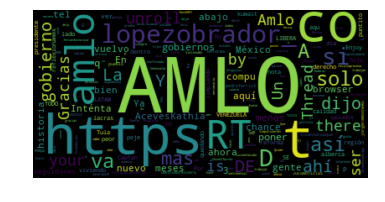

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc_pos = WordCloud()
wc_pos.generate_from_frequencies(positive)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis("off")



(-0.5, 399.5, 199.5, -0.5)

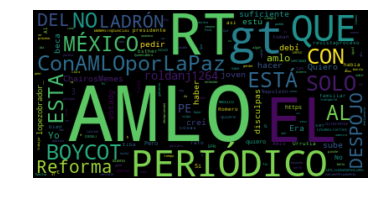

In [31]:
wc_neg = WordCloud()
wc_neg.generate_from_frequencies(negative)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis("off")

# Streams

Una forma de capturar tuits es a través de un stream, que es una conexión a los tuits entrantes

In [ ]:
from tweepy import Stream
from tweepy.streaming import StreamListener

class Listener(StreamListener):
    def __init__(self, filename):
        super(Listener, self).__init__()
        self.writer = jsonlines.open(filename,"a")
        self.counter=0
    
    def on_status(self, status):
        self.writer.write(status._json)
        self.counter+=1
        if self.counter%20==0:
            print(".",end="")
        return(True)
    
    def on_error(self, status):
        print("Error",status)
        
myStreamListener = Listener("stream.ndjson")
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)

myStream.filter(track=['amlo'])

Error 401
Error 401
Error 401
Error 401
Error 401
